In [21]:
import uproot 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px


In [22]:
my_tuple1 = uproot.open("00222479_00000001_1.data_turbopass_bandq_lb2jpsilmd.root:Hlt2BandQ_Lb2JpsiLambdaTT/DecayTree;1")
my_tuple2 = uproot.open("00222479_00000002_1.data_turbopass_bandq_lb2jpsilmd.root:Hlt2BandQ_Lb2JpsiLambdaTT/DecayTree;1")
my_tuple3 = uproot.open("00222479_00000003_1.data_turbopass_bandq_lb2jpsilmd.root:Hlt2BandQ_Lb2JpsiLambdaTT/DecayTree;1")
my_tuple4 = uproot.open("00222479_00000004_1.data_turbopass_bandq_lb2jpsilmd.root:Hlt2BandQ_Lb2JpsiLambdaTT/DecayTree;1")
my_tuple5 = uproot.open("00222479_00000005_1.data_turbopass_bandq_lb2jpsilmd.root:Hlt2BandQ_Lb2JpsiLambdaTT/DecayTree;5")

In [23]:
keys = ["Jpsi_PT","L_END_VRHO","L_BPVDIRA","L_BPVIP","L_BPVIPCHI2","L_MASS","Lb_BPVDIRA","Lb_BPVIP","Lb_BPVVDRHO","Lb_MAXDOCA","Lb_P","Lb_PT","Lb_CHI2","p_PID_P","p_PID_K","p_MINIP","p_P","p_PT","pim_P","pim_PT"]

In [24]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_roc_curve

In [25]:
model = CatBoostClassifier().load_model("TFG_model")

In [26]:
model.feature_names_

['Jpsi_PT',
 'Lambda0_END_VRHO',
 'Lambda0_BPVDIRA',
 'Lambda0_BPVIP',
 'Lambda0_BPVIPCHI2',
 'Lambda0_MASS',
 'Lb_BPVDIRA',
 'Lb_BPVIP',
 'Lb_BPVVDRHO',
 'Lb_MAXSDOCA',
 'Lb_P',
 'Lb_PT',
 'Lb_CHI2',
 'p_plus_PID_P',
 'p_plus_PID_K',
 'p_plus_MINIP',
 'p_plus_P',
 'p_plus_PT',
 'pi_minus_P',
 'pi_minus_PT']

In [27]:
keys

['Jpsi_PT',
 'L_END_VRHO',
 'L_BPVDIRA',
 'L_BPVIP',
 'L_BPVIPCHI2',
 'L_MASS',
 'Lb_BPVDIRA',
 'Lb_BPVIP',
 'Lb_BPVVDRHO',
 'Lb_MAXDOCA',
 'Lb_P',
 'Lb_PT',
 'Lb_CHI2',
 'p_PID_P',
 'p_PID_K',
 'p_MINIP',
 'p_P',
 'p_PT',
 'pim_P',
 'pim_PT']

In [28]:
model.set_feature_names(keys)

In [29]:
model.feature_names_

['Jpsi_PT',
 'L_END_VRHO',
 'L_BPVDIRA',
 'L_BPVIP',
 'L_BPVIPCHI2',
 'L_MASS',
 'Lb_BPVDIRA',
 'Lb_BPVIP',
 'Lb_BPVVDRHO',
 'Lb_MAXDOCA',
 'Lb_P',
 'Lb_PT',
 'Lb_CHI2',
 'p_PID_P',
 'p_PID_K',
 'p_MINIP',
 'p_P',
 'p_PT',
 'pim_P',
 'pim_PT']

In [30]:
signal_data1 = my_tuple1.arrays(keys+['Lb_MASS']+['EVENTNUMBER'],library="pd")
signal_data2 = my_tuple2.arrays(keys+['Lb_MASS']+['EVENTNUMBER'],library="pd")
signal_data3 = my_tuple3.arrays(keys+['Lb_MASS']+['EVENTNUMBER'],library="pd")
signal_data4 = my_tuple4.arrays(keys+['Lb_MASS']+['EVENTNUMBER'],library="pd")
signal_data5 = my_tuple5.arrays(keys+['Lb_MASS']+['EVENTNUMBER'],library="pd")

In [31]:
signal_data12 = pd.merge(signal_data1,signal_data2, how="outer")
signal_data34 = pd.merge(signal_data3,signal_data4, how="outer")
signal_data345 = pd.merge(signal_data34,signal_data5, how="outer")
signal_data = pd.merge(signal_data12,signal_data345, how="outer")

In [32]:
signal_data

,Jpsi_PT,L_END_VRHO,L_BPVDIRA,L_BPVIP,L_BPVIPCHI2,L_MASS,Lb_BPVDIRA,Lb_BPVIP,Lb_BPVVDRHO,Lb_MAXDOCA,...,Lb_CHI2,p_PID_P,p_PID_K,p_MINIP,p_P,p_PT,pim_P,pim_PT,Lb_MASS,EVENTNUMBER
0,1078.198120,193.885605,0.999996,13.923080,8.853090,2426.947266,0.999400,0.162174,0.183305,4.975512,...,8.754868,10.493713,8.326550,268.166931,30109.138672,1893.517090,14104.093750,1714.975952,6217.453613,32053260336
1,1562.717041,250.617752,0.999998,12.014529,3.160447,1129.941162,0.997465,0.070519,0.069393,9.845050,...,3.808784,17.659134,11.479801,67.581566,32606.974609,1581.906860,5603.385254,217.819962,5883.376953,32102322389
2,5302.384277,403.117065,0.999982,40.031052,17.262867,1276.670898,0.999975,0.033909,0.106794,15.132817,...,17.781603,1.294796,-4.582445,135.860260,29985.548828,1245.754517,11370.059570,1036.247314,5603.938477,32249439145
3,793.319336,88.308449,0.999805,87.508850,30.141340,1125.891357,0.999126,0.130926,0.134902,43.575630,...,30.198717,-0.048327,2.803040,8.299838,58466.847656,1121.564087,8601.628906,812.175232,6112.802246,4235015976
4,793.319336,120.686615,0.999999,7.218201,2.339905,1275.248047,0.998978,0.141640,0.135167,7.353931,...,2.420652,0.335881,1.019729,20.156385,74986.601562,1416.174438,9274.668945,175.937378,5908.926270,4235015976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15878497,1944.127930,130.160706,0.999915,57.466537,34.402489,1850.549927,0.999961,0.075392,0.164391,34.674164,...,34.705982,0.406792,0.518918,25.874264,25229.658203,783.437378,14576.846680,824.337952,5433.608398,5628891518
15878498,1944.127930,138.502502,0.999973,41.099648,2.321305,2782.504639,0.999978,0.056336,0.163324,20.790606,...,2.613195,2.556051,-1.429279,154.483795,32587.072266,1246.842407,17510.363281,1361.663818,6301.854980,5628891518
15878499,1944.127930,160.222824,0.999924,52.653694,8.187226,1501.852783,0.985394,0.168799,0.187251,26.309324,...,9.182647,12.070574,10.082272,73.616112,33634.152344,1330.172729,17642.677734,1165.926147,5154.951660,5628891518
15878500,1944.127930,376.908173,0.999931,92.286003,9.815055,2797.604736,0.999910,0.114579,0.163154,32.899090,...,10.608176,7.838321,1.644772,350.961975,33937.917969,3095.733398,3161.302490,561.593811,6063.951660,5628891518


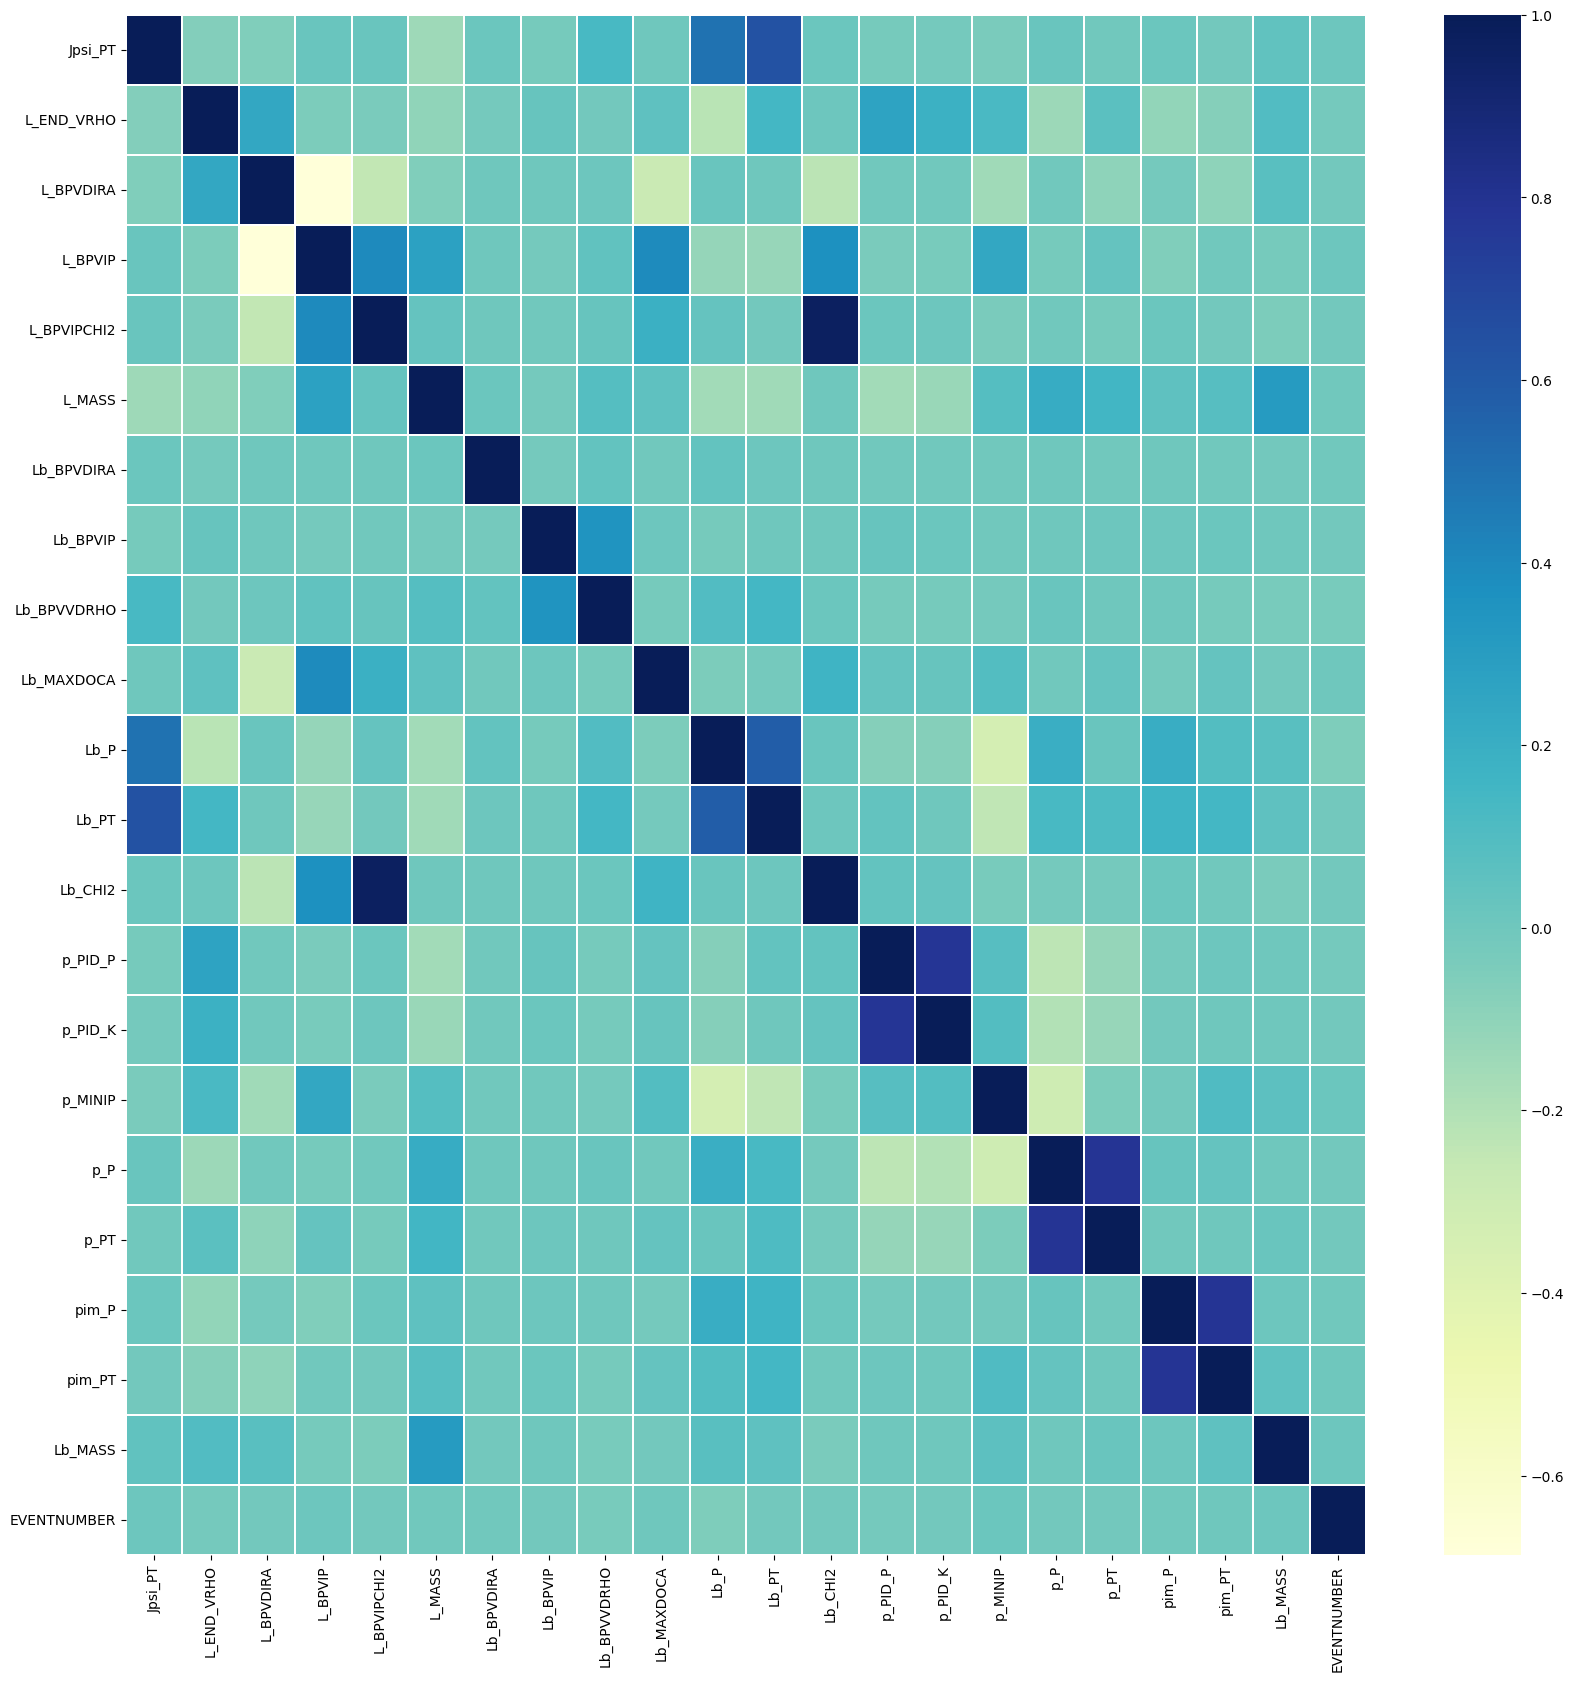

In [33]:
f, ax = plt.subplots(figsize =(20, 20))
sns.heatmap(signal_data.corr(), ax = ax, cmap ="YlGnBu", linewidths = 0.1)
plt.show()

In [34]:
prob = model.predict_proba(signal_data)
print(prob)

[[9.99861940e-01 1.38059582e-04]
 [5.47956712e-01 4.52043288e-01]
 [7.02277400e-01 2.97722600e-01]
 ...
 [9.85488358e-01 1.45116421e-02]
 [9.97908608e-01 2.09139181e-03]
 [8.07998610e-01 1.92001390e-01]]


In [35]:

signal_MVA_prob_eval = prob
signal_MVA_probs = [1 - i[0] for i in signal_MVA_prob_eval]
signal_data['prob'] = signal_MVA_probs
corte = 0.9
signal_data_filtered_prob = signal_data[np.array(signal_MVA_probs) > 0.3]

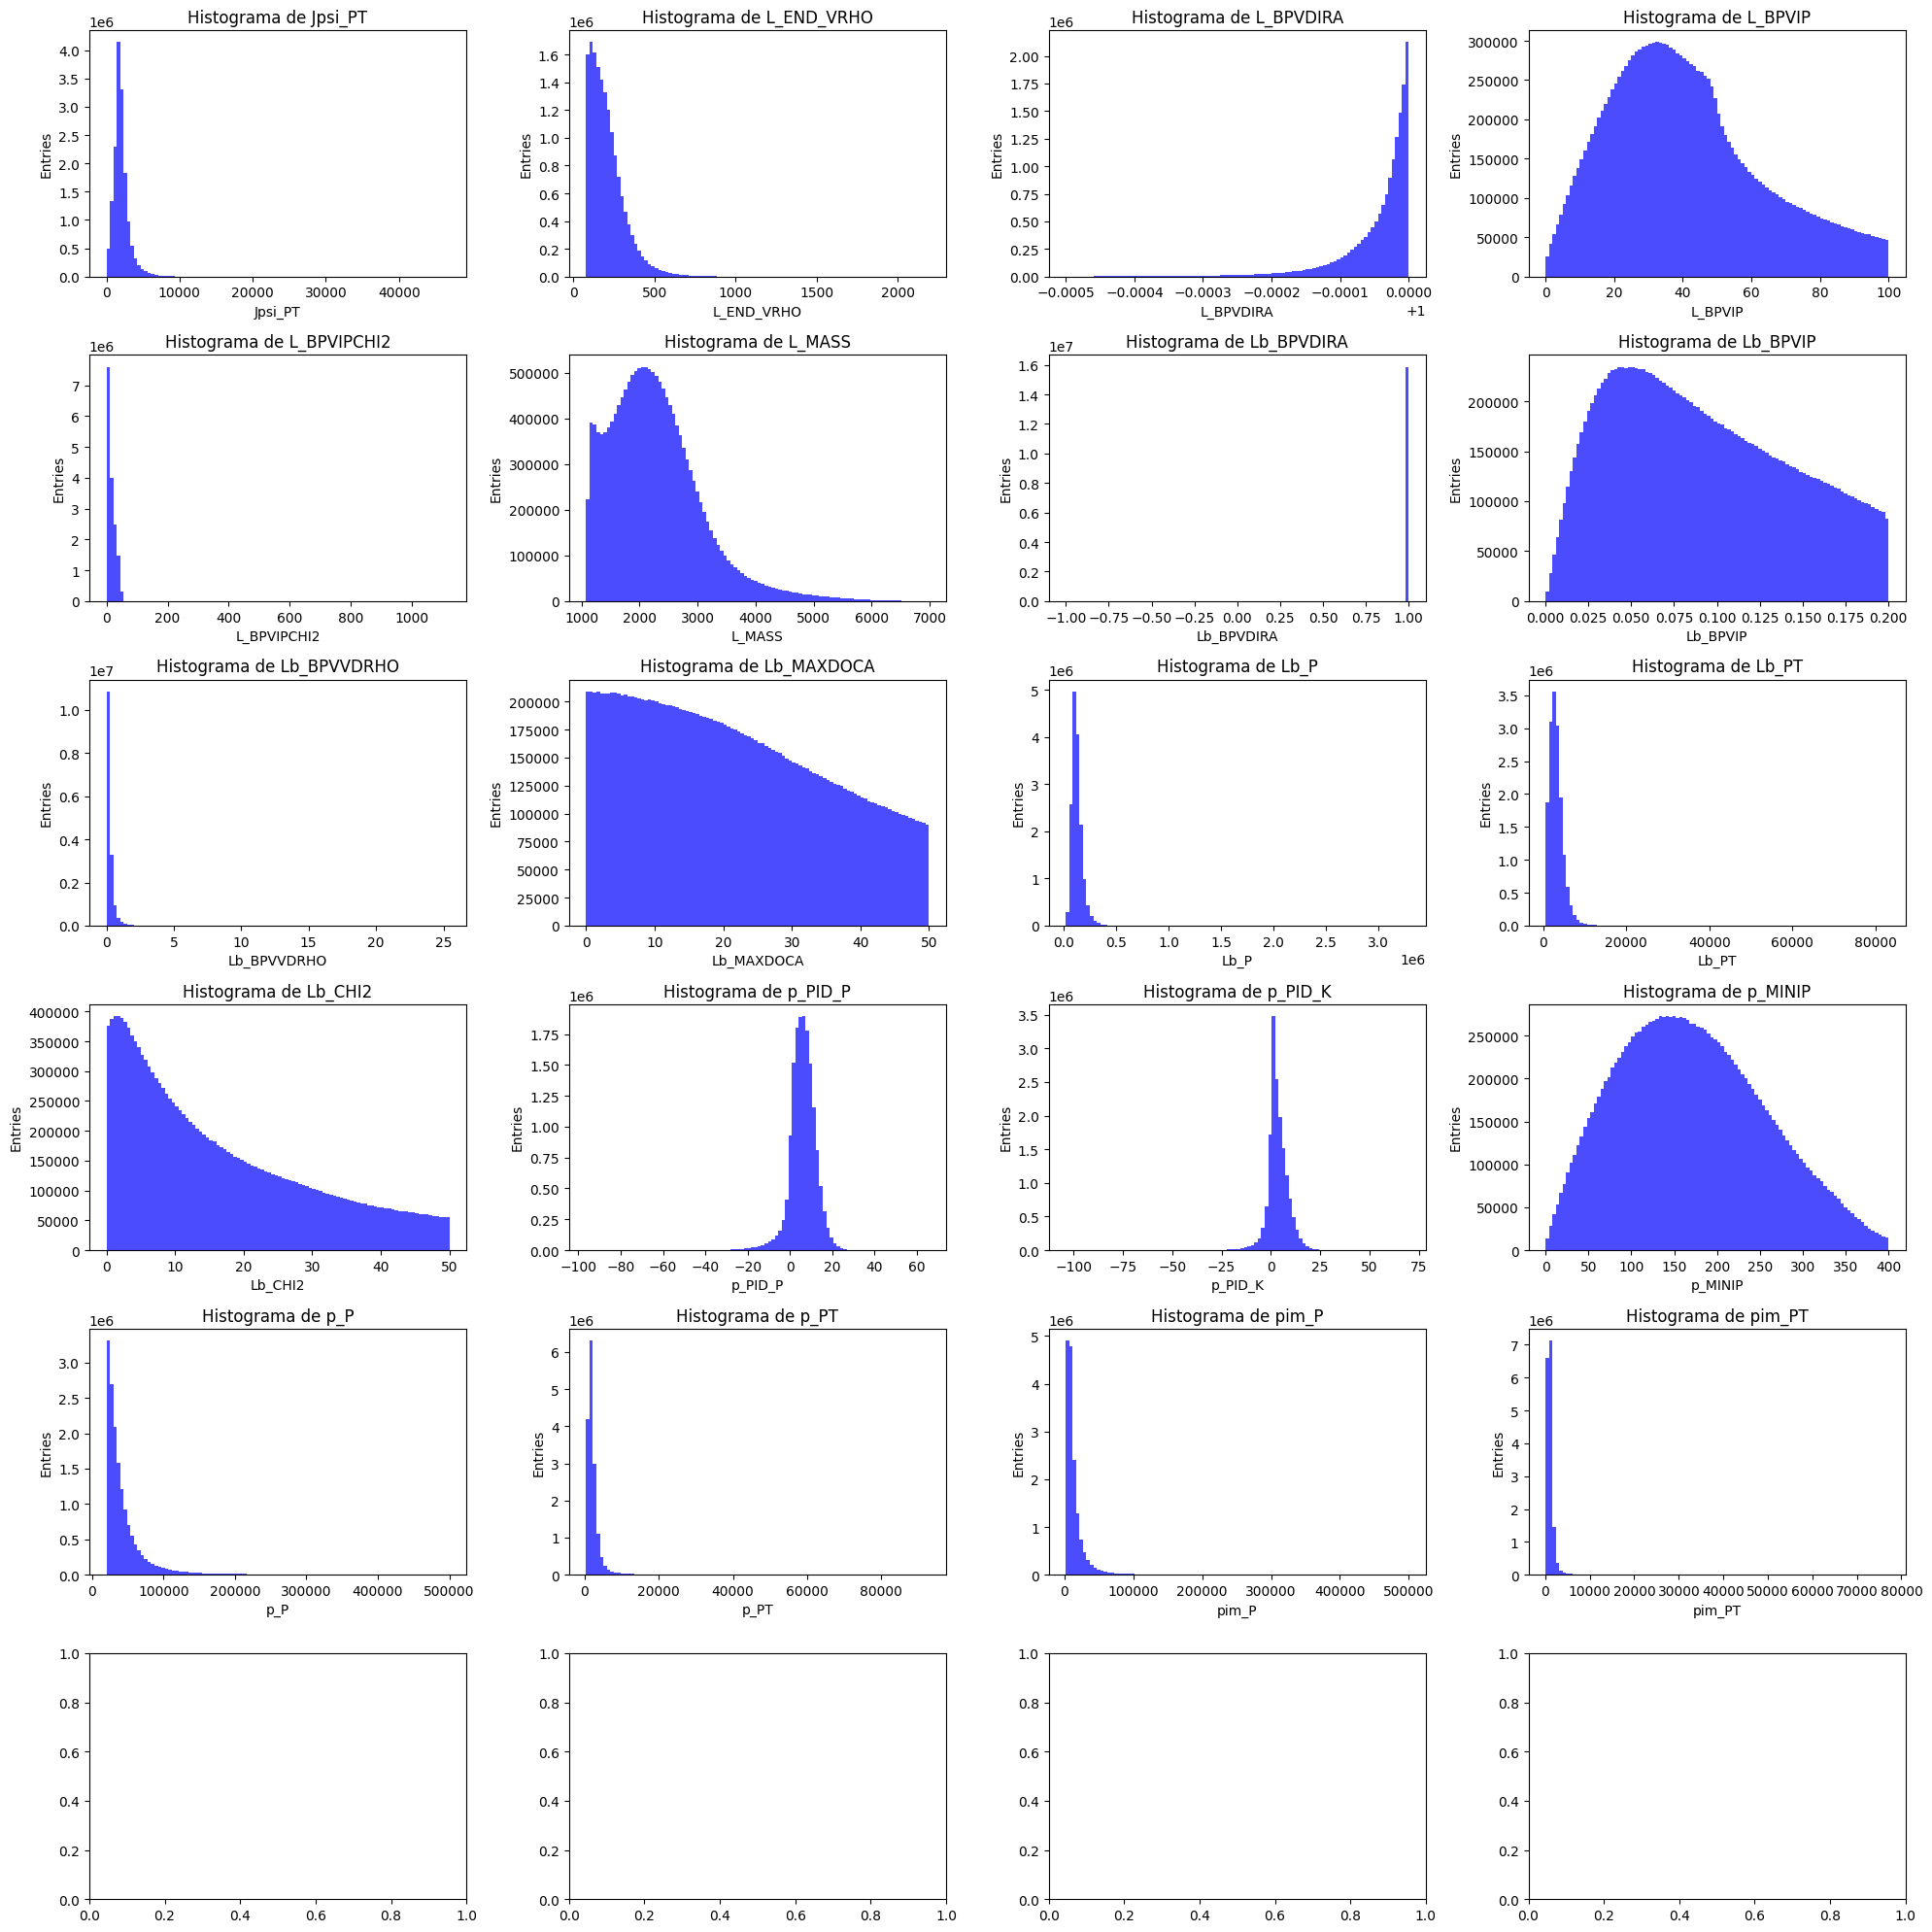

In [36]:
import matplotlib.pyplot as plt

num_bins = 100

# Configuración de la figura y ejes
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))

# Iterar sobre las variables y graficar un histograma para cada una
for i, variable in enumerate(keys):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    ax.hist(signal_data[variable], bins=num_bins, color='blue', alpha=0.7)
    ax.set_xlabel(variable)
    ax.set_ylabel('Entries')
    ax.set_title('Histograma de {}'.format(variable))

plt.tight_layout()
plt.show()

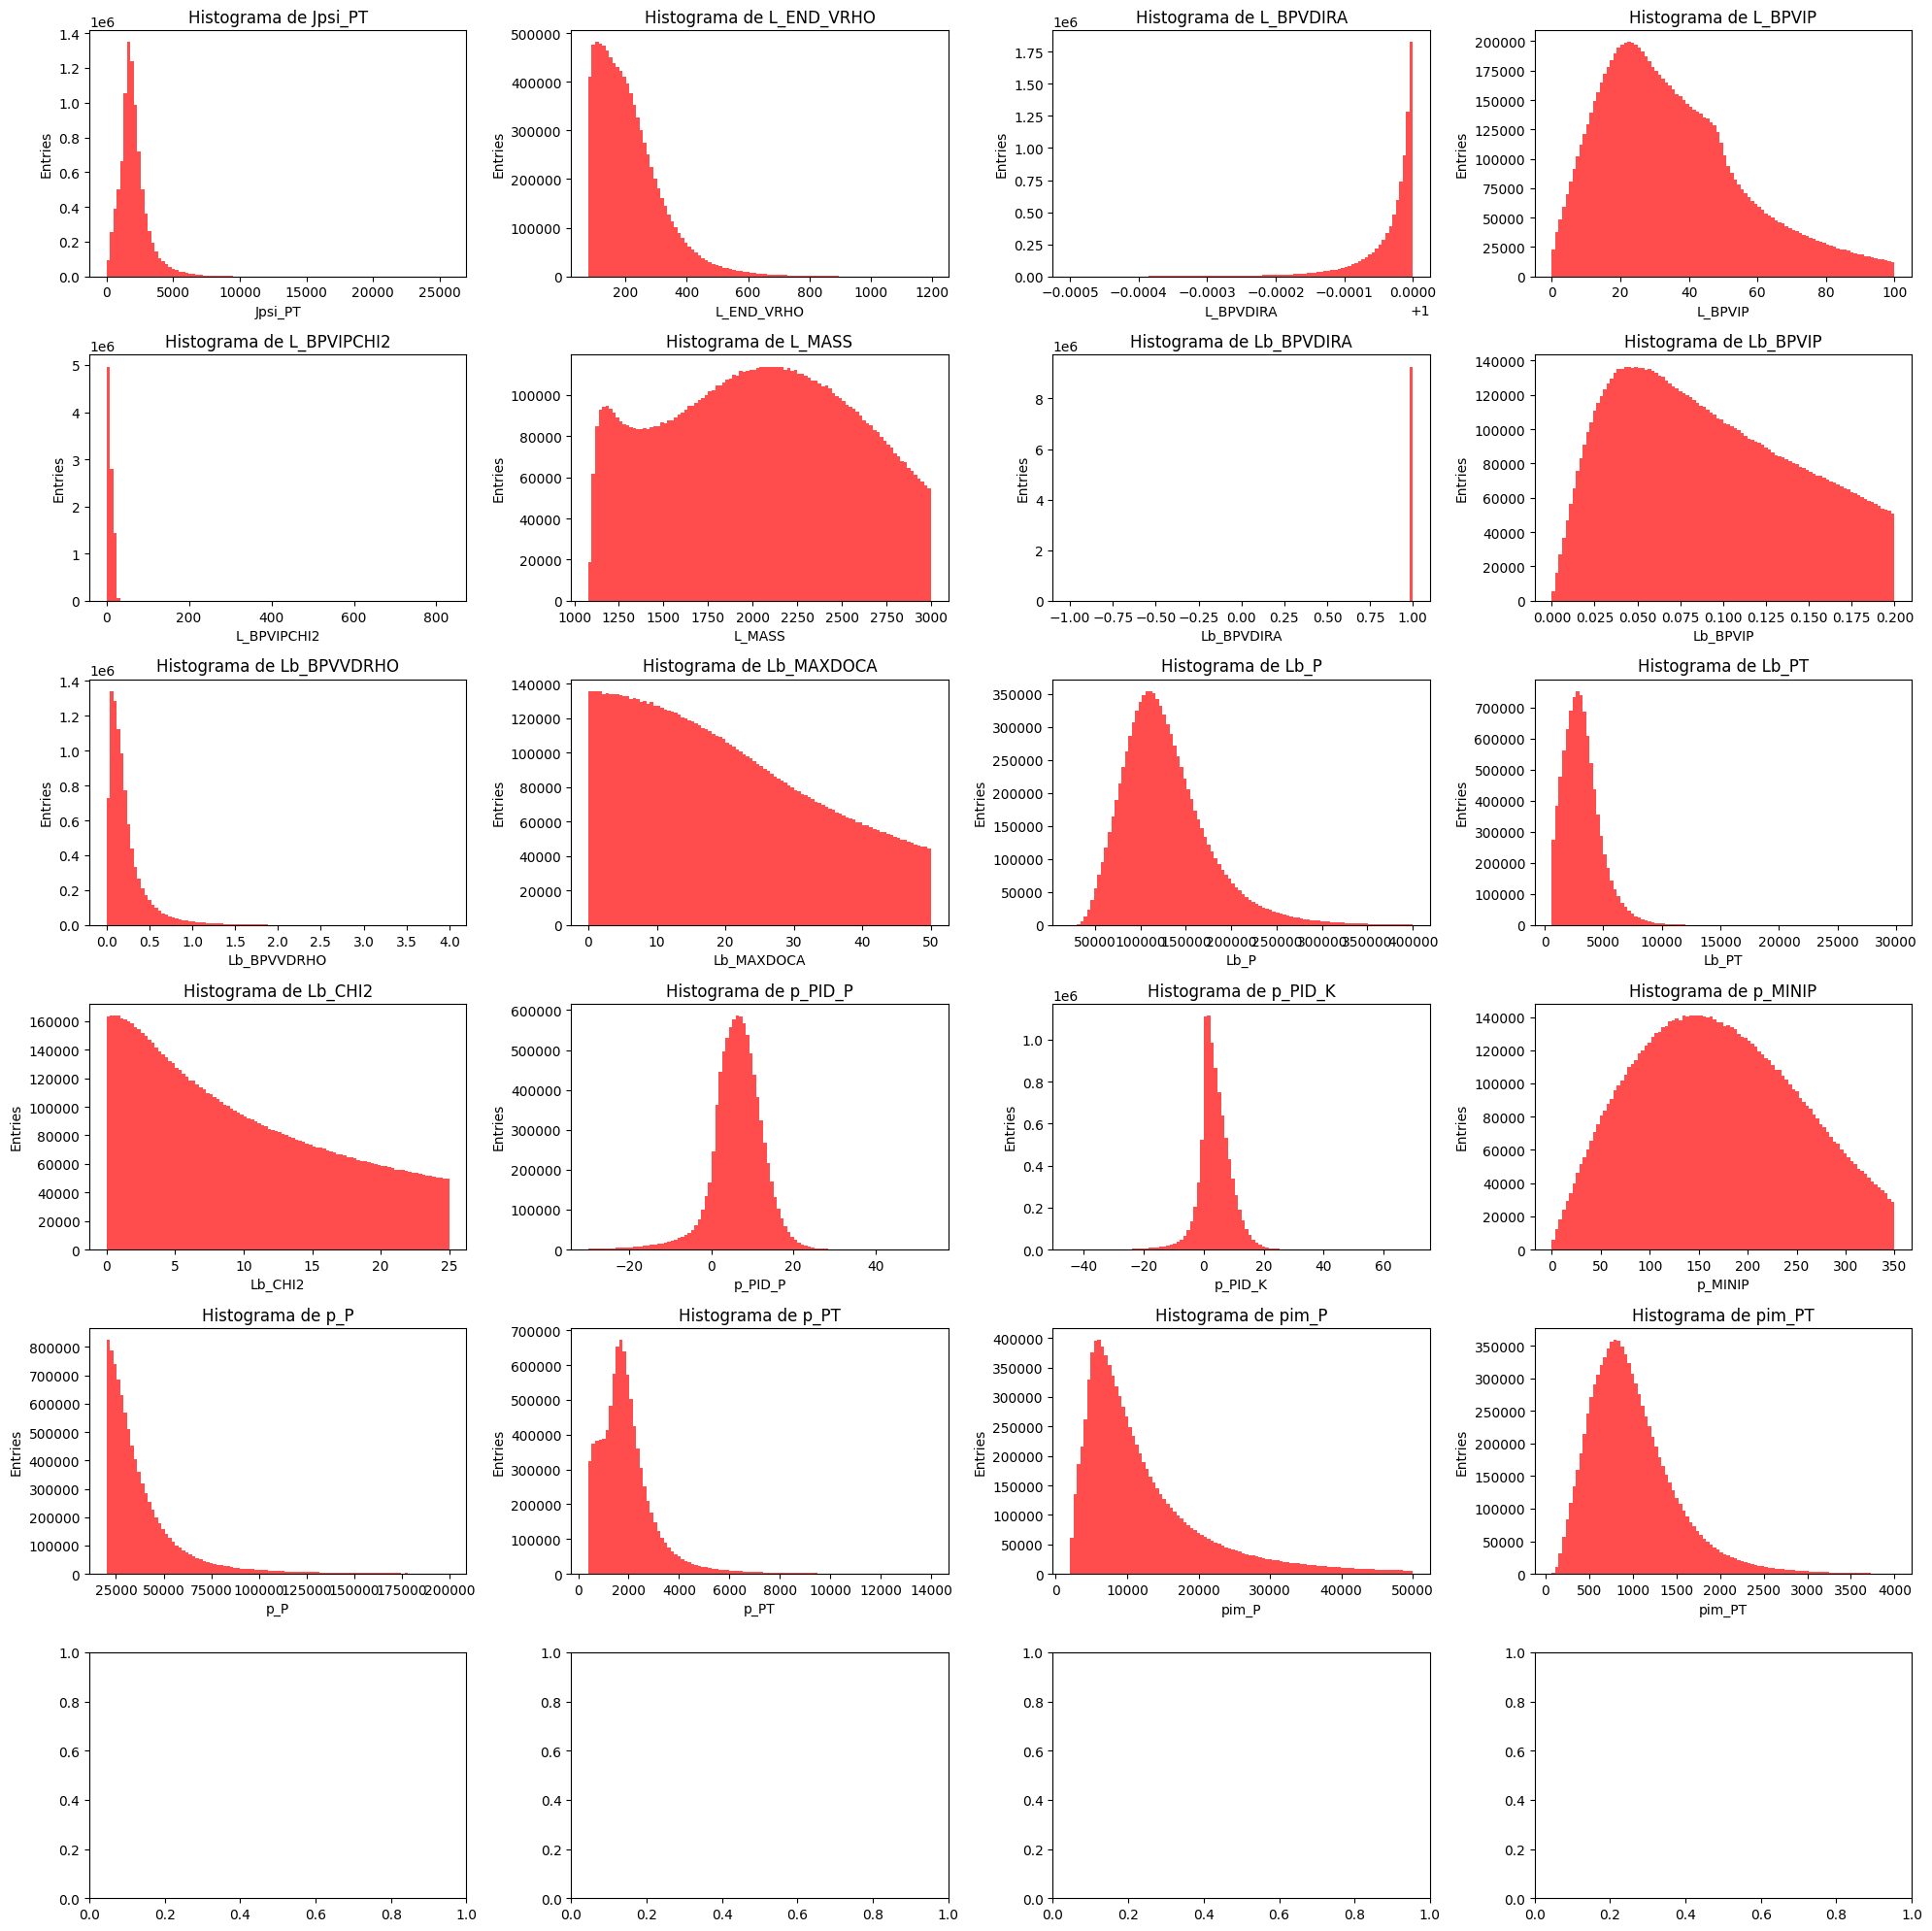

In [37]:


num_bins = 100

# Configuración de la figura y ejes
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))

# Iterar sobre las variables y graficar un histograma para cada una
for i, variable in enumerate(keys):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    ax.hist(signal_data.query("(Lb_P < 400000) & (Lb_PT < 30000) & (Lb_BPVIP < 0.2) & (Lb_BPVVDRHO < 4) & (Lb_CHI2 < 25) & (Lb_MAXDOCA < 50) & (L_BPVIP < 100) & (L_END_VRHO < 1200) & (L_MASS < 3000) & (p_MINIP < 350) & (p_PID_P < 60 ) & (p_PID_P > -30) & (p_P < 200000) & (p_PT < 14000) & (pim_P < 50000) & (pim_PT < 4000)")[variable], bins=num_bins, color='red', alpha=0.7)
    ax.set_xlabel(variable)
    ax.set_ylabel('Entries')
    ax.set_title('Histograma de {}'.format(variable))

plt.tight_layout()
plt.show()

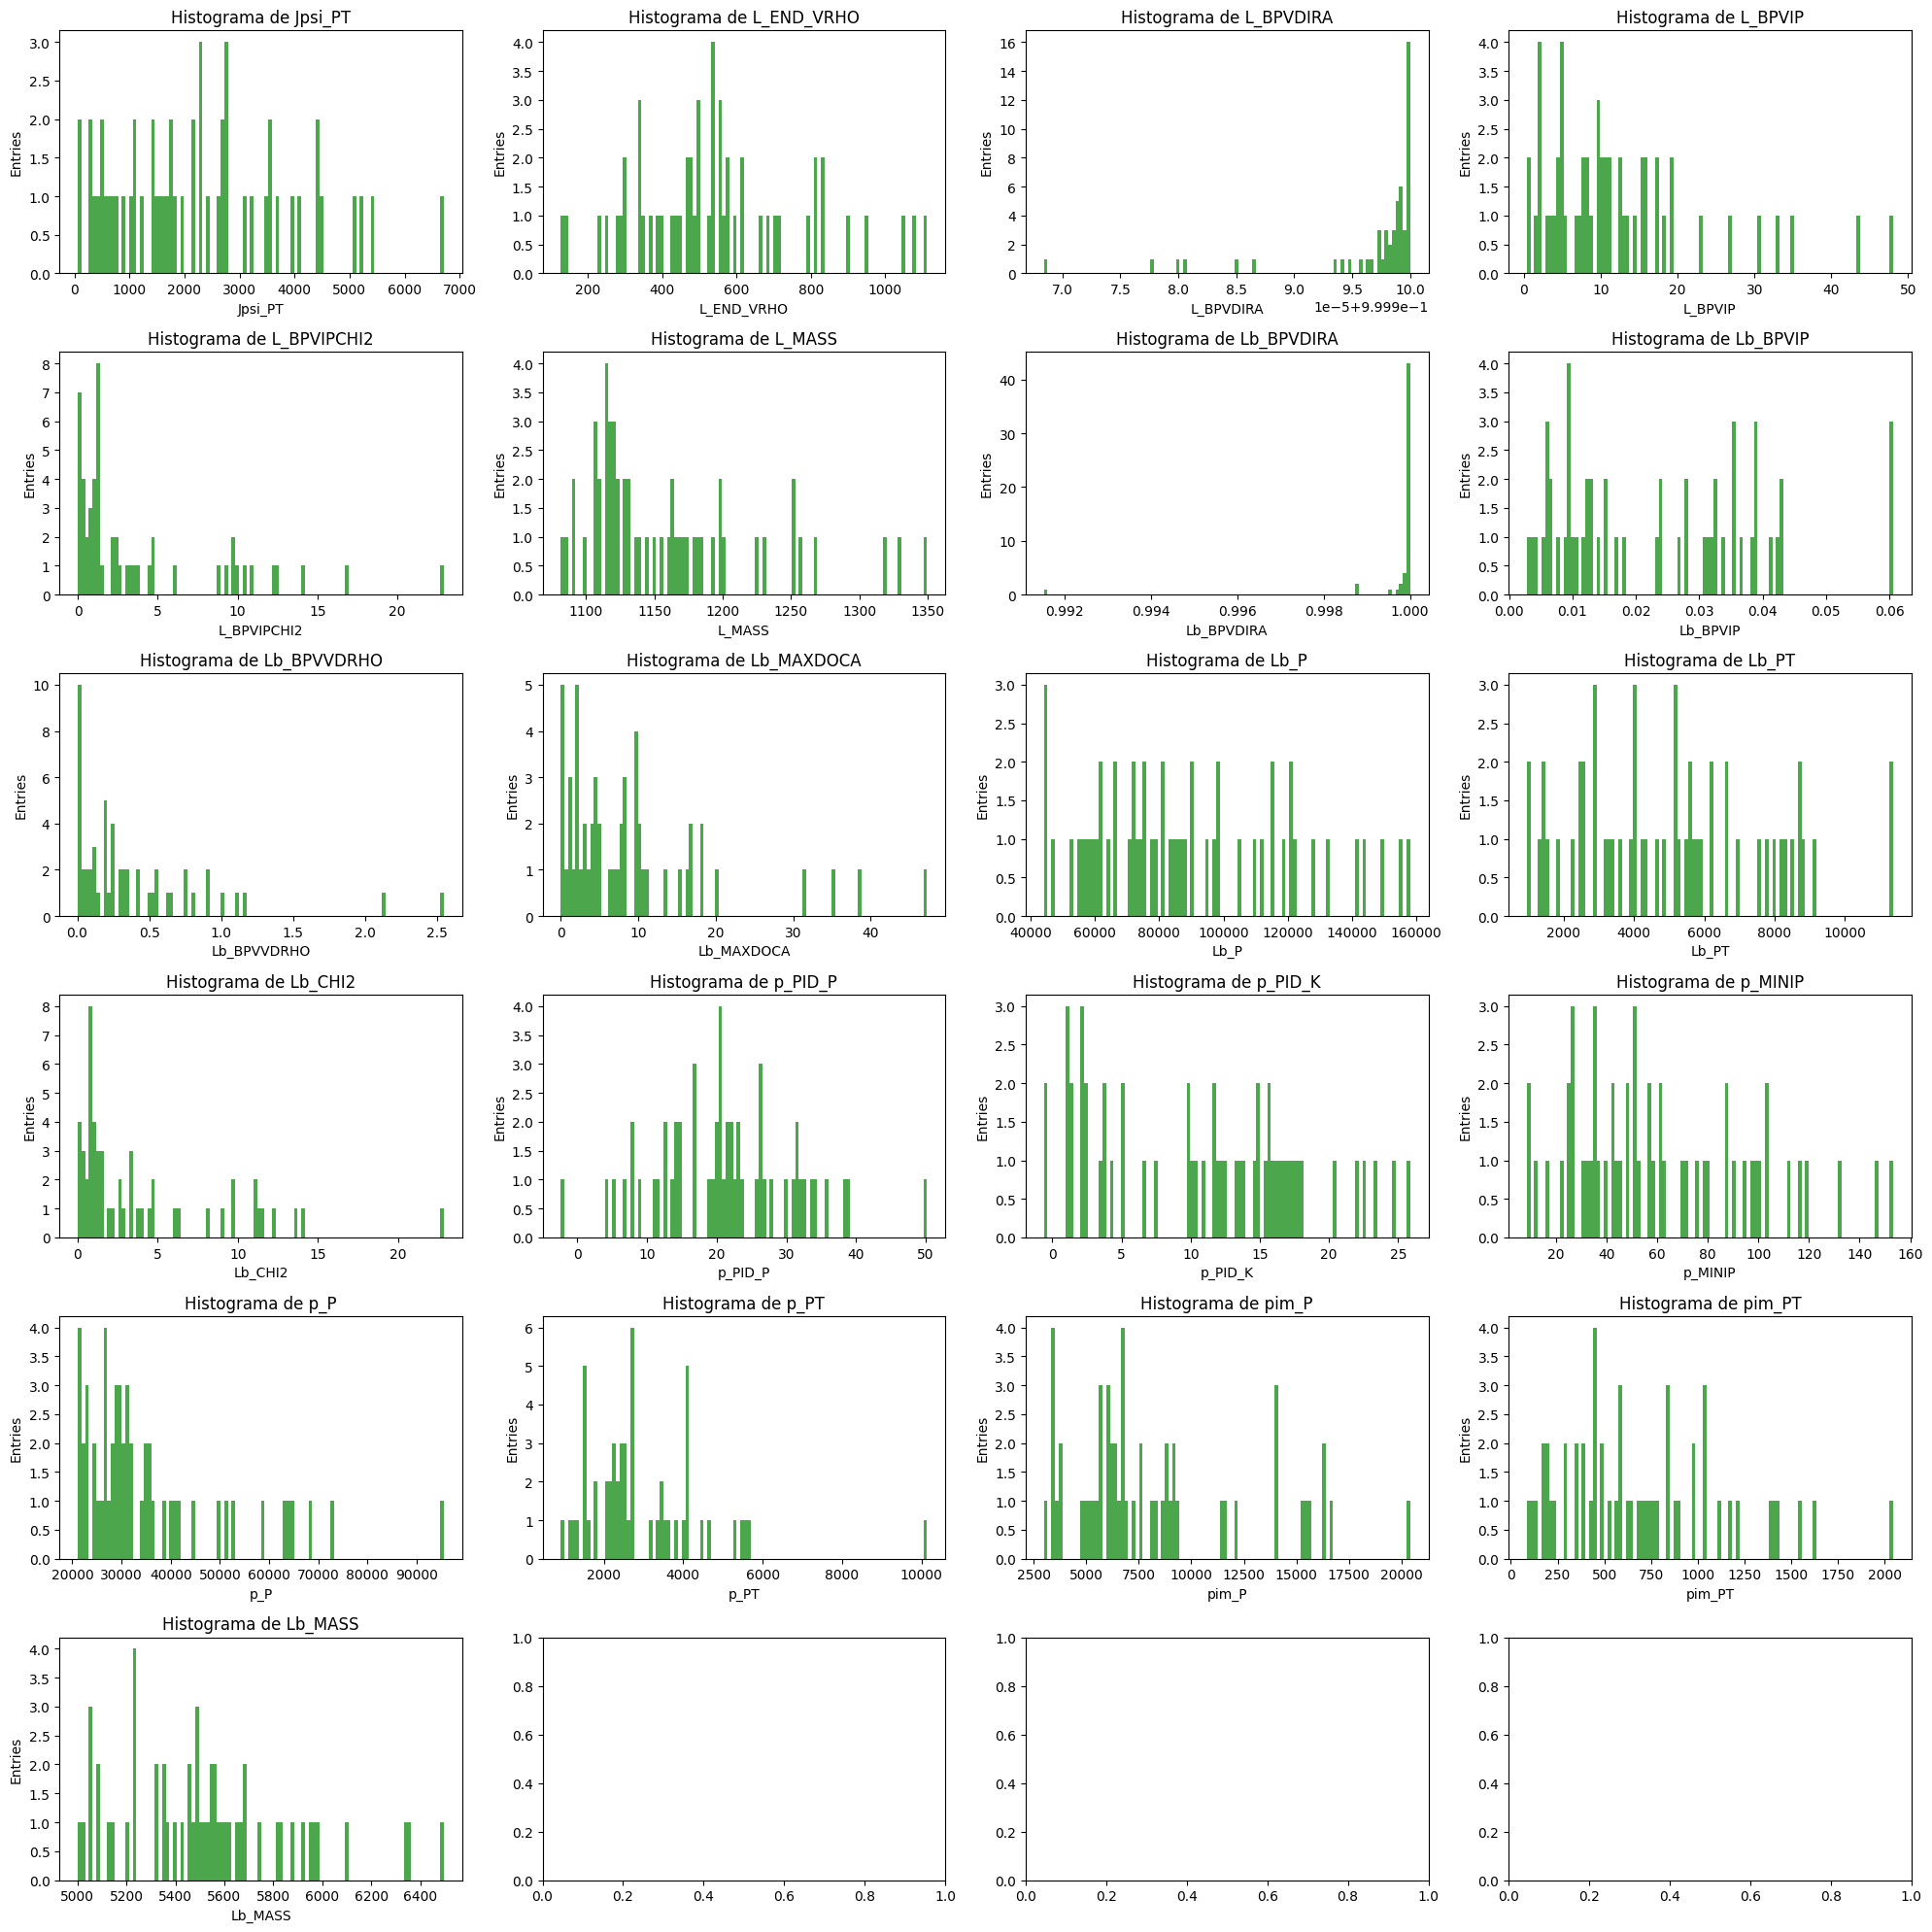

In [39]:

num_bins = 100

# Configuración de la figura y ejes
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))

# Iterar sobre las variables y graficar un histograma para cada una
for i, variable in enumerate(keys+['Lb_MASS']):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    ax.hist(signal_data.query("(prob > 0.99) & (Lb_P < 400000) & (Lb_PT < 30000) & (Lb_BPVIP < 0.2) & (Lb_BPVVDRHO < 4) & (Lb_CHI2 < 25) & (Lb_MAXDOCA < 50) & (L_BPVIP < 100) & (L_END_VRHO < 1200) & (L_MASS < 3000) & (p_MINIP < 350) & (p_PID_P < 60 ) & (p_PID_P > -30) & (p_P < 200000) & (p_PT < 14000) & (pim_P < 50000) & (pim_PT < 4000)")[variable], bins=num_bins, color='green', alpha=0.7)
    ax.set_xlabel(variable)
    ax.set_ylabel('Entries')
    ax.set_title('Histograma de {}'.format(variable))

plt.tight_layout()
plt.show()